# 6.1: Processing Suparnas Data
This notebook processes the data files provided by Suparna

In [1]:
# Needed to make animations real.
%matplotlib inline
#%matplotlib nbagg
#%matplotlib widget

In [2]:
# General imports for math
import numpy.random as rnd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Imports to make animation work
import matplotlib.animation as animation
import matplotlib.patches as patches
import matplotlib.path as path
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

from IPython.display import HTML

# Access graphing parameters
import matplotlib.mlab as mlb
from matplotlib import rc
import seaborn as sns

In [4]:
# Advanced Math
from scipy import optimize as opt
from scipy.interpolate import interp1d
from scipy import stats as stats
from sklearn.preprocessing import normalize
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray
from skimage import io
from skimage import exposure
from skimage import data, io, segmentation, color
from skimage.future import graph
from skimage.segmentation import random_walker
from skimage.data import binary_blobs
from skimage.exposure import rescale_intensity

/home/ldcbishop/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [5]:
# General Diagnostics and other handy items
import math
import time
import os
import timeit
from timeit import default_timer as timer

# Trouble Shooting
#from pympler.classtracker import ClassTracker
#from pympler import tracker

In [7]:
# Graphing parameters for inline images.
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 4
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 4
plt.rcParams['xtick.minor.size'] = 4
plt.rcParams['xtick.minor.width'] = 2
#Graphing parameters that I can alter (Need to make this a full method at some point)
font = {
        'weight': 'bold',
        'size': 12,
        'family': 'serif',
        'serif': 'Times New Roman'}
rc('font', **font)
rc('xtick', labelsize = 30)
rc('ytick', labelsize = 30)
rc('lines', linewidth = 4)
rc('axes', linewidth = 4.5)
rc('text', usetex = 'False')
rc('animation', html = 'html5')
# Handy link about changing rc parameters https://matplotlib.org/users/customizing.html
bounding_box = [-1, -0.5, 2, 0.9] # Sets the bounds for the plots below

# Block of code to generate a unique spot to save everyting automatically
date = time.strftime("%Y_%m_%d") # Date string for dynamic saving.
vers = 'Suparnas_Data' # A string to denote a differen version for dynamic saving.
nb = 'nb6.1' # Number of the notebook for dynamic saving.
directory = './saved_outputs/'+date +'/'+nb+'/'+vers+'/'
if not os.path.exists(directory):
    os.makedirs(directory)
print(directory)
# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

./saved_outputs/2019_07_24/nb6.1/Suparnas_Data/


In [8]:
# Boolean for saving results
save = False
pix2nm = 193.8 # Number of nanometers per pixel in these images
frames_to_process = 50
frame_tol = 2
real_particle_count = list()

In [10]:
### Declare troika experiment w/ specified sample
from troika_functions import *
from particle import *
t_e = troikaExperiment('7-2000FRAMES-1_mins-1.tif', verbose = False, is_linking = True, track_time = True, frame_tolerance = frame_tol)
start_time = timeit.default_timer()
for i in range(frames_to_process):
    t_e.identifyParticles(intensity_cutoff = 95)
    t_e.nextFrame()
    if i % 10 == 0:
        real_particle_count.append(len(t_e.getRealParticles()))
print((timeit.default_timer() - start_time)/60, 'minutes')

RuntimeError: dictionary changed size during iteration

485


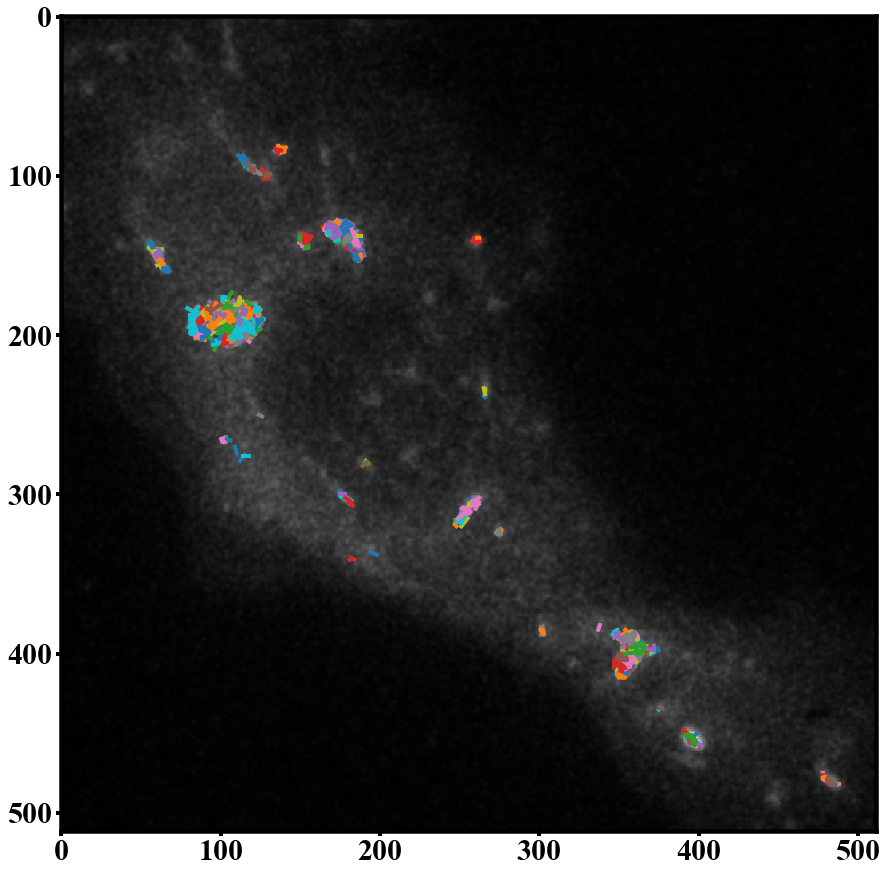

In [11]:
plt.figure(figsize = (15,15))
plt.imshow(t_e.getFrame(0))
print len(t_e.getRealParticles())
for i in t_e.getRealParticles():
    part = t_e.getParticle(i)
    plt.plot(part.getYCoords(), part.getXCoords())

In [12]:
part = t_e.getParticle((0,1))

In [19]:
frame = t_e.getFrame(0)
frame[frame<20] = 0

In [26]:
import cv2
cv2.adaptiveThreshold(frame,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

ImportError: No module named cv2